## Stitching de las imagenes

In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import stitching
import os
#bundle ajustment
#lucas-kanade algoritme, unet con generador de medulas sinteticas, whatershet

True

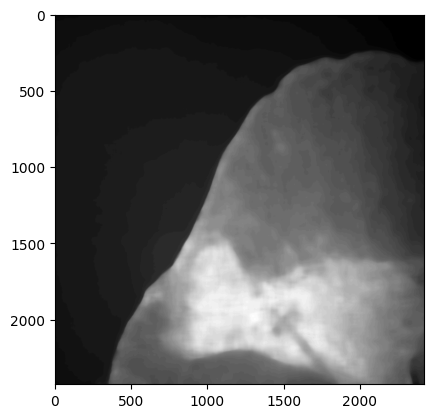

In [23]:
img1 = cv2.imread('BJZ5-A1-12-BDA-1.tif')
gray1 = img1[:,:,2]

median = cv2.medianBlur(gray1,65)

plt.imshow(median,cmap='gray')
cv2.imwrite("gray.jpg",gray1)

23.0


True

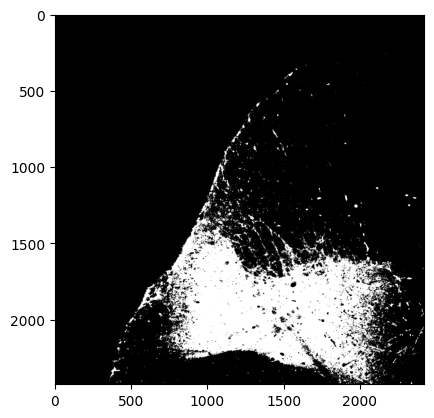

In [24]:
ret2,th2 = cv2.threshold(median,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret2)
plt.imshow(gray1 > (ret2 + 10), cmap='gray')


cv2.imwrite("impunts.jpg", ret2)

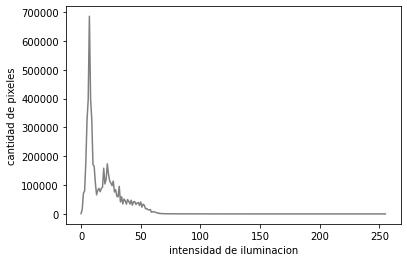

In [34]:
hist = cv2.calcHist([gray1], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()


(array([[2.424e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.424e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.424e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.388e+03, 3.500e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.392e+03, 3.200e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.396e+03, 2.800e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 2424 BarContainer objects>)

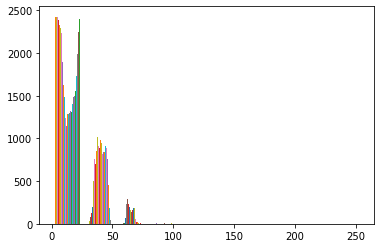

In [30]:
plt.hist(gray1)

In [8]:
settings = {"detector": "sift", "confidence_threshold": 0.2}
stitcher = stitching.Stitcher(**settings)
list_dir = os.listdir()
list_dir.sort()
panorama = stitcher.stitch(list_dir[1:3])

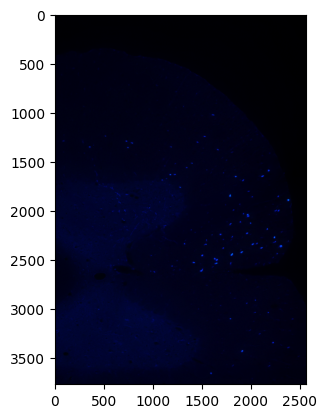

In [9]:
plt.imshow(panorama)
plt.show()